# IGP 5 Models

## Feature Importance Evaluation

In [130]:
# load functions in python file with magic command
%run ../code/feature-importance.py

### Evaluation with SHAP and VIF

Using `SHAP` (SHapley Additive exPlanations):
* cooperative game theory which calculates contribution of each feature to the prediction
* can be used on any model
* positive values mean feature contributes to increasing the prediction; negative value decreases predition

Using `VIF` (Variance Inflation Factor):
* measure to quantify severity of multicollinearity -highly correlated features which lead to unreliable estimates of regression coefficient
* high VIF (greater than 5, 10) suggest that multicollinearity may be an issue - redundant feature or highly correlated


### Evaluation with wrapper, filter, embedded

* **filter**
  * evaluates performance of each model after selecting top_n (5) features using `SelectKBest` with ANOVA F-value as the scoring function
  * selects features based on individual relevance to target
* **wrapper**
  * evaluates performance of each model after selecting top_n (5) featues using `Recursive Feature Elimination` (RFE) with cross-validation
  * selects features baased on contribution to model performance
  * some models cannot be assessed with this, e.g. `QDA`
* **embedded**
  * evaluates performance of each model after training on entire dataset without feature selection
  * trains models with feature selection built into learning process

## Correlation Matrix


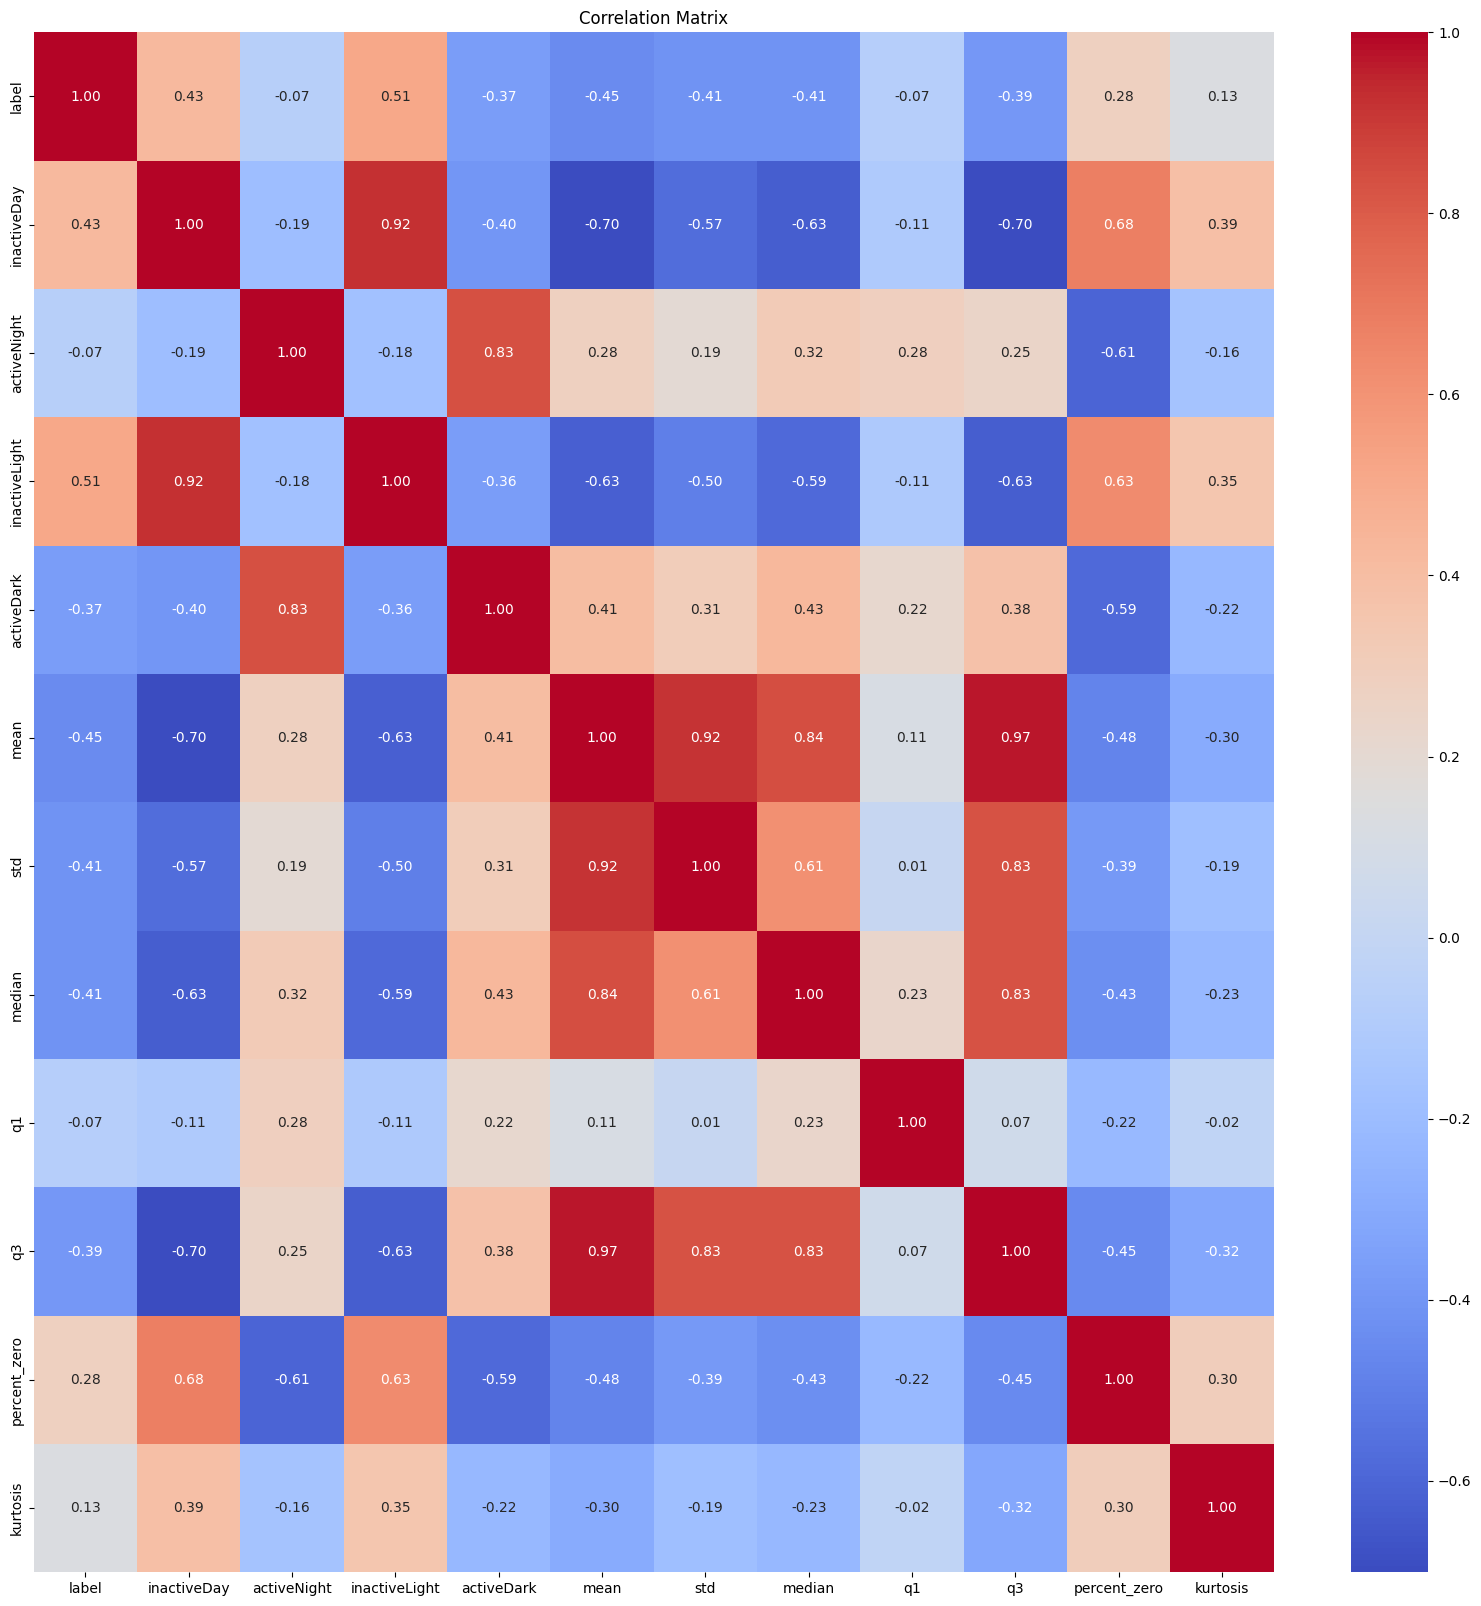

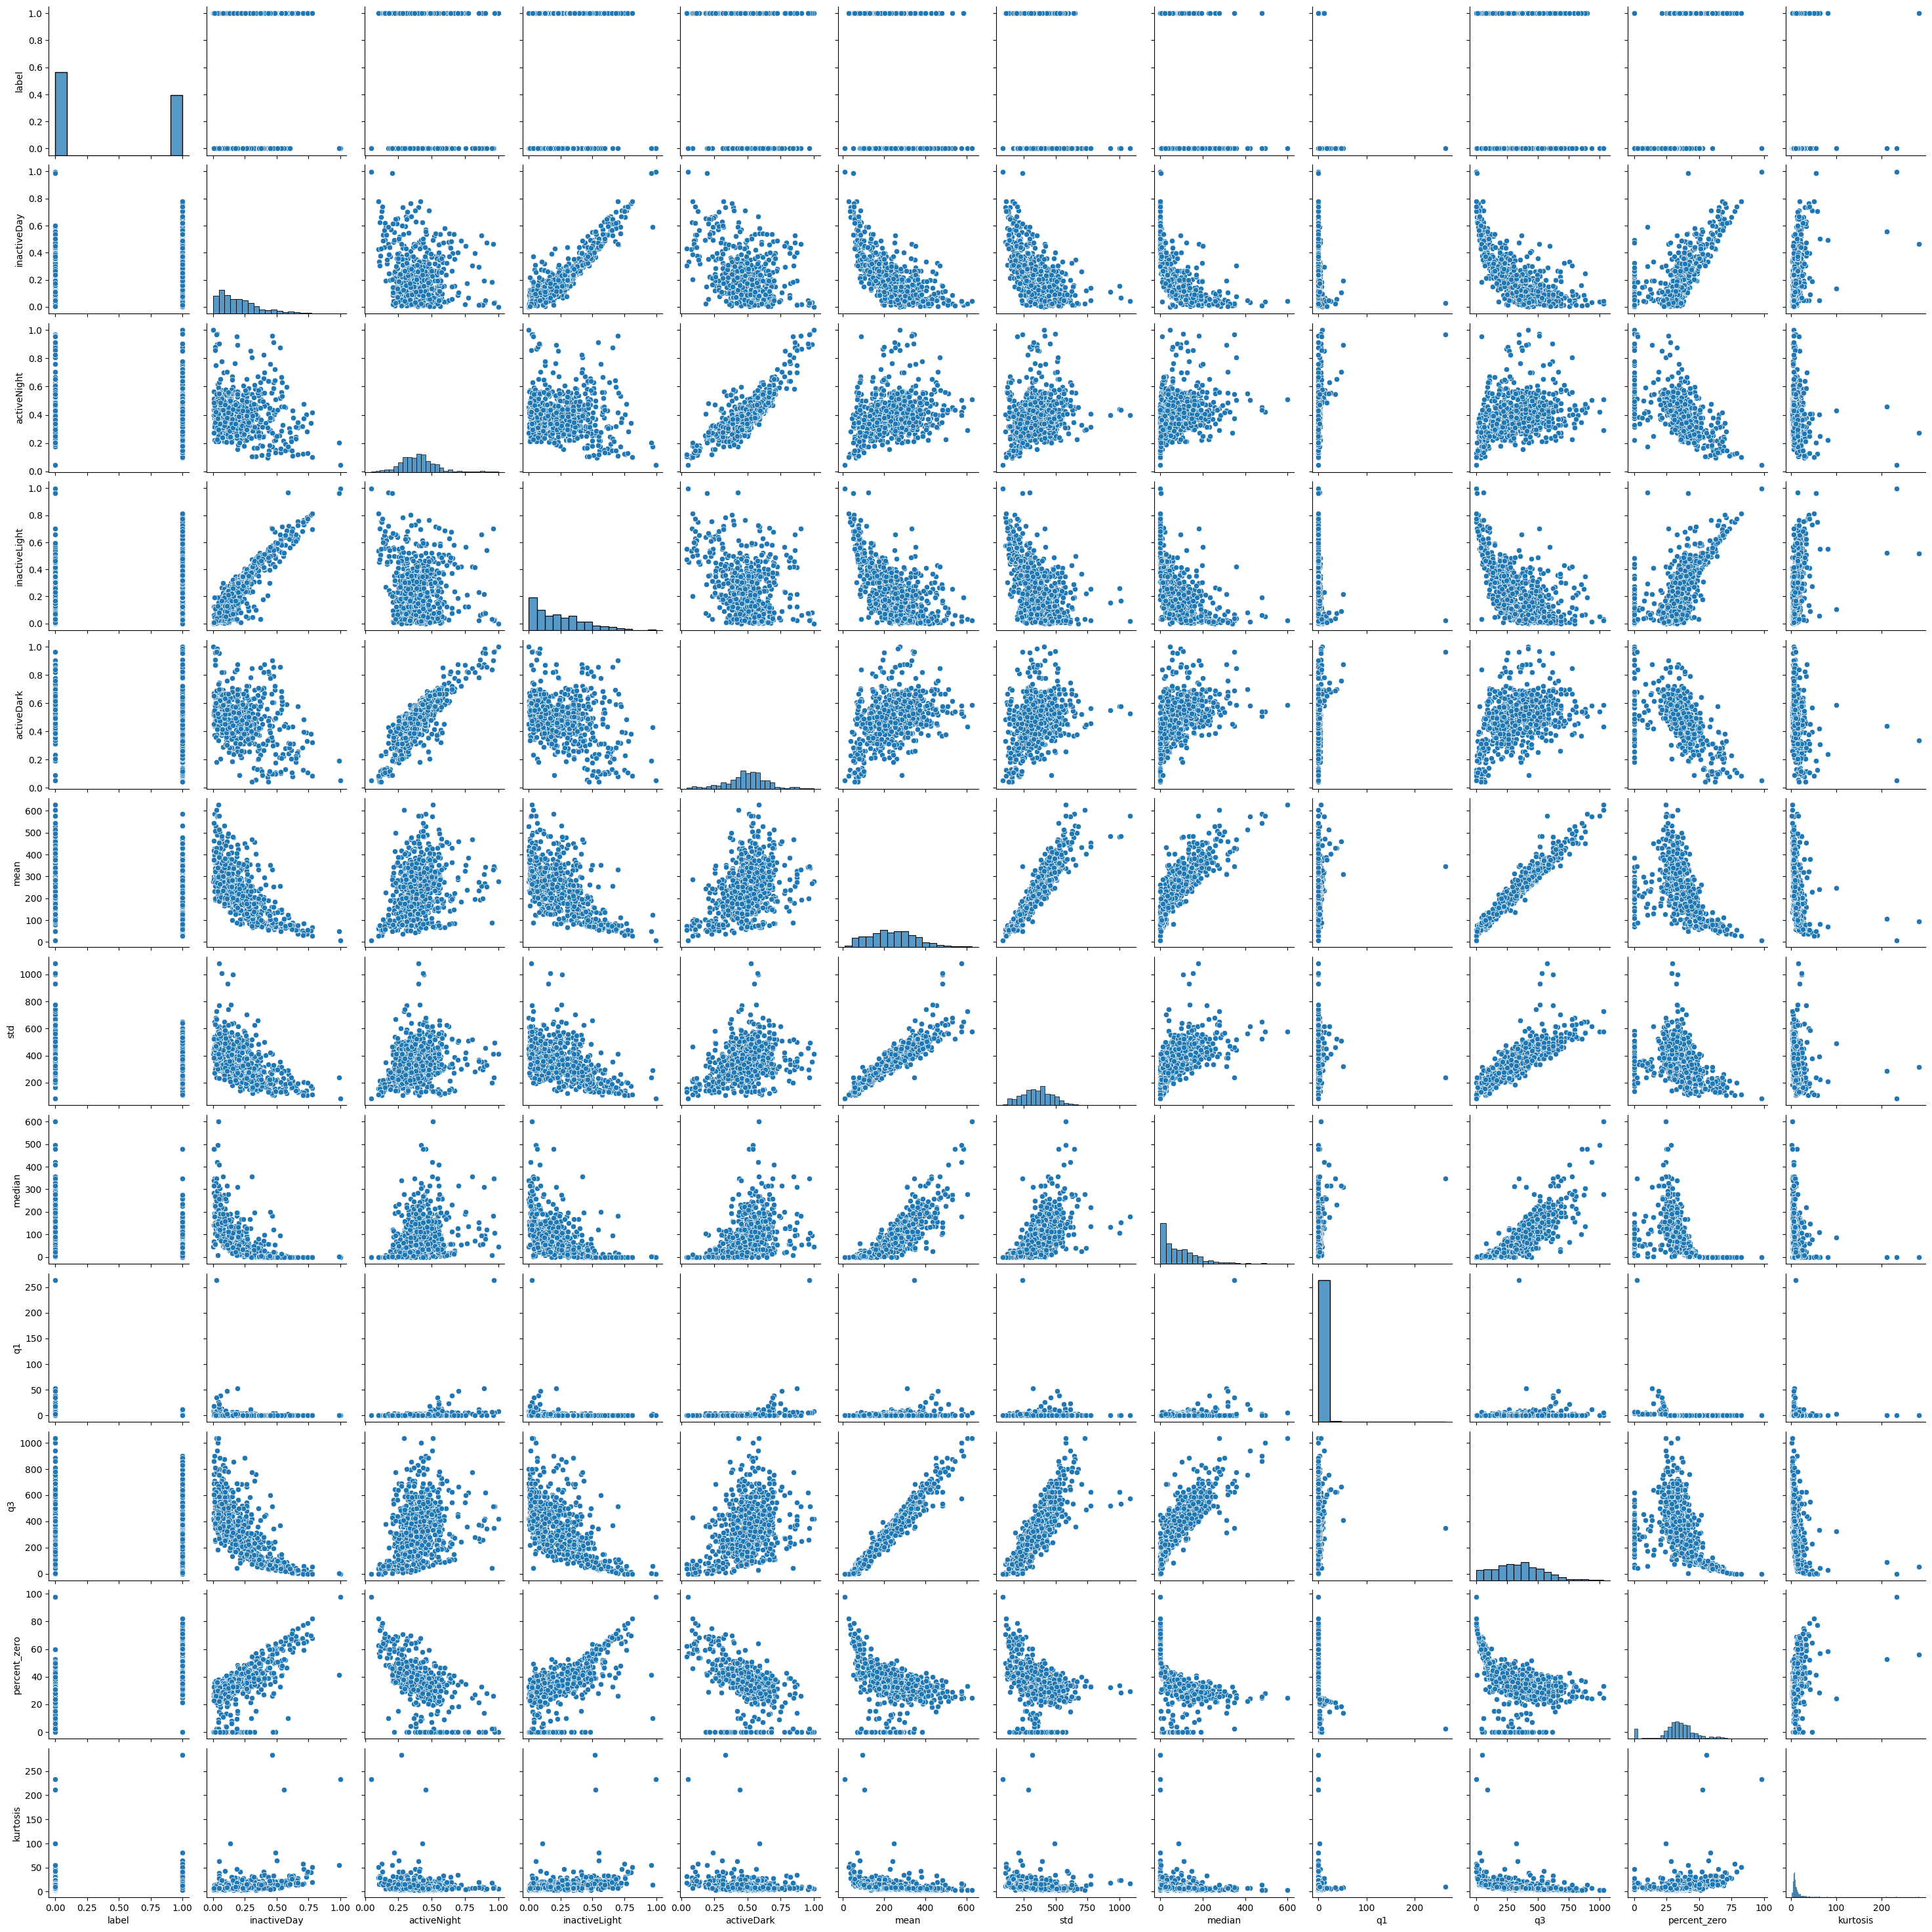

In [2]:
# read both (all)
both = pd.read_csv(output_csv_path + 'both.csv')

# plot correlation matrix
correlation_matrix = both.corr(method='pearson')
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# pair plot of all features
sns.pairplot(both)
plt.show()



**Correlation Matrix**

*Highly correlated*
* inactiveLight / inactiveDay
* activeDark / activeNight
* mean / q3
* mean / median
* q3 / std
* q3 / median


Because the goal is a simple model which is interpretable, I am opting for dropping features instead of `Principal Component Analysis` - which is dimensionality reduction but keeping features.

### Male Dataset

`Neural network`, `SVC linear`, `SVM linear`, `SVM rbf`, `QDA`, `Logistic Regression`  are top five models going to next round - feature evaluation.

In [7]:
# read from csv
male_X_train_scaled = pd.read_csv(output_csv_path + 'male_X_train_scaled.csv')
male_y_train = pd.read_csv(output_csv_path + 'male_y_train.csv').iloc[:, 0]

In [8]:
# fit each model
for model_name, model in models_male:
    model.fit(male_X_train_scaled, male_y_train)

In [9]:
male_vif = calculate_vif(male_X_train_scaled)
print(male_vif.sort_values(by='VIF', ascending=False))

                      VIF
mean           437.870539
q3              93.509645
std             81.614283
median          22.637522
inactiveDay     12.779848
inactiveLight   11.070559
activeNight      5.085378
activeDark       3.728611
percent_zero     3.633123
q1               2.453269
kurtosis         1.843272


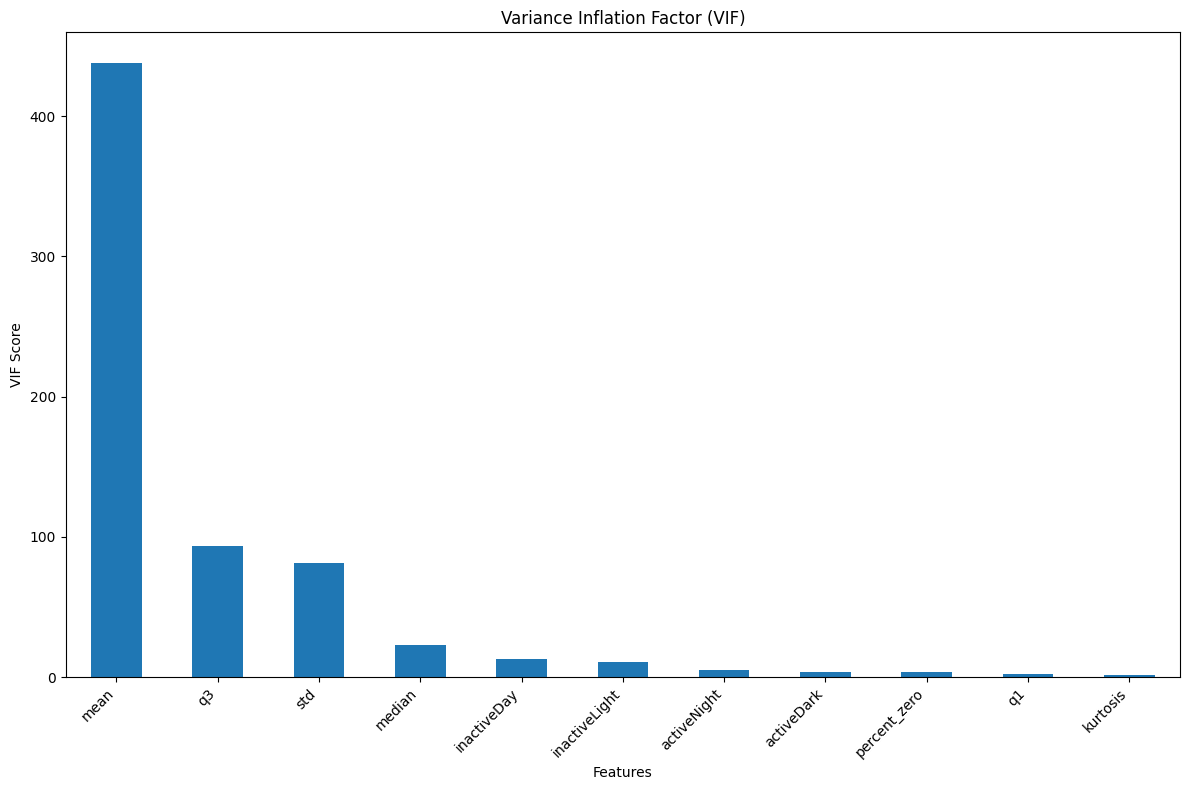

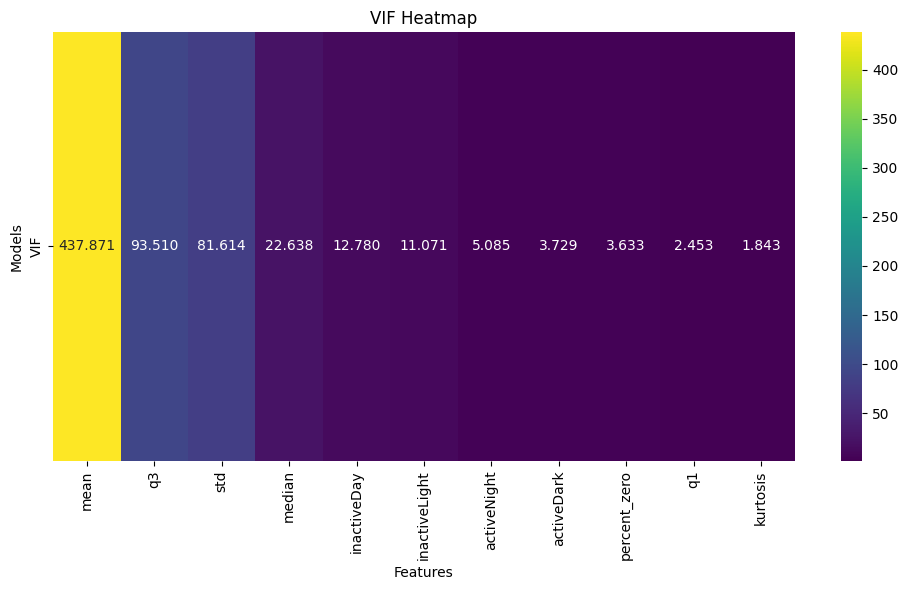

In [10]:
# bar plot vif
plot_vif(male_vif)

# heatmap vif
plot_vif_heatmap(male_vif)

### **VIF**

* as expected high multicollinearity - most features are highly correlated
* `mean`, `q3` and `std` 
* `inactiveDay` and `inactiveLight`

In [11]:
# fit each model
for model_name, model in models_male:
    model.fit(male_X_train_scaled, male_y_train)

# shap values for male model
male_shap = calculate_shap_feature_importance(models_male, male_X_train_scaled, shap_sampling='auto')

Using 263 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/263 [00:00<?, ?it/s]

Using 263 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/263 [00:00<?, ?it/s]

Using 263 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/263 [00:00<?, ?it/s]

Using 263 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/263 [00:00<?, ?it/s]

Using 263 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/263 [00:00<?, ?it/s]

Using 263 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/263 [00:00<?, ?it/s]

In [12]:
# save shap to pickle

file_path = output_csv_path + 'male_shap.pkl'

# male_shap pickle file
with open(file_path, 'wb') as file:
    pickle.dump(male_shap, file)


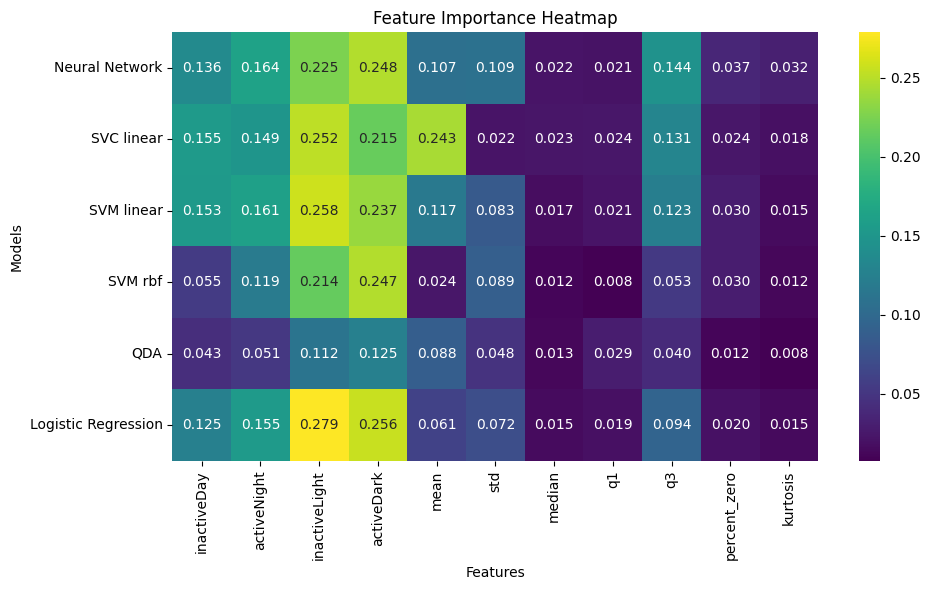

<Figure size 1000x600 with 0 Axes>

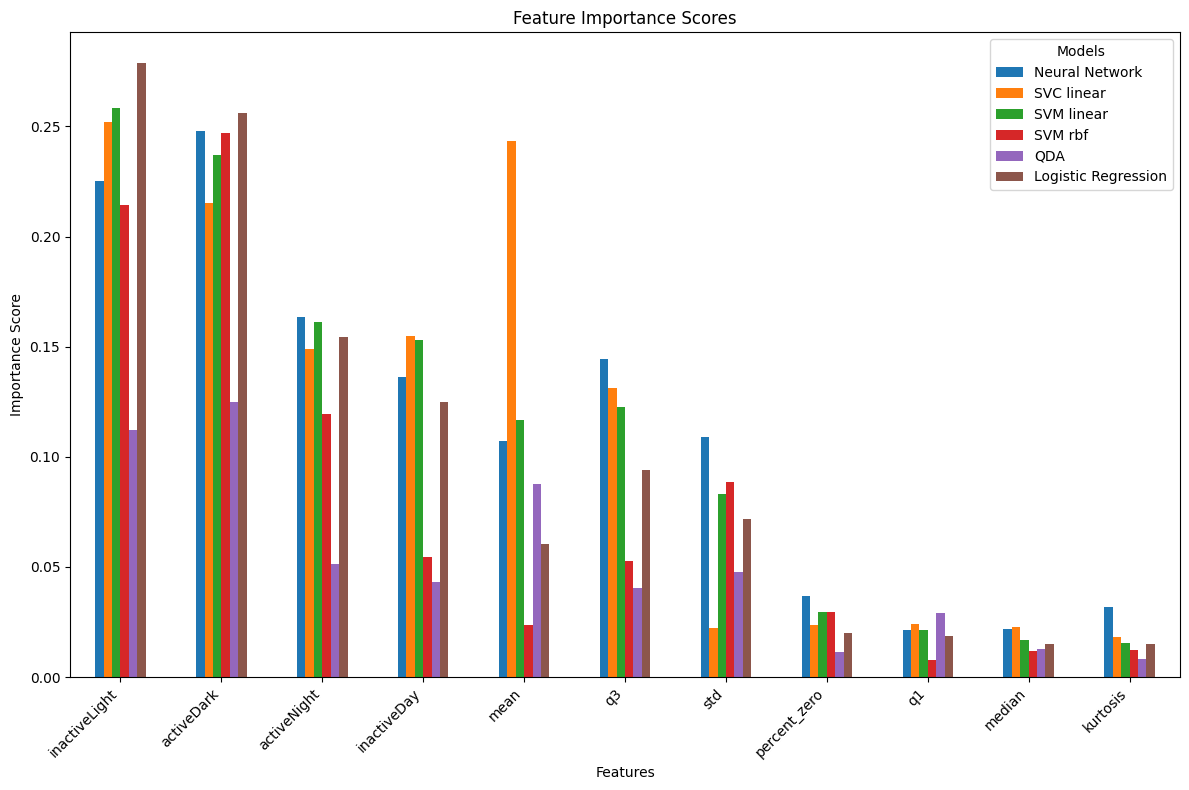

In [13]:
# Sshap heatmap
plot_feature_importance_heatmap(male_shap)
# plot feature importance for each model
plot_feature_shap(male_shap)

### **SHAP**

* Most important features are `inactiveDay`, `activeNight`, `inactiveLight`, activedark, `mean`

In [14]:
# reesults
filter_results, filter_feat_idx = filter_method(male_X_train_scaled, male_y_train, models_male)

{'Neural Network': 0.8440493468795355, 'SVC linear': 0.7983309143686503, 'SVM linear': 0.8172714078374457, 'SVM rbf': 0.8401306240928884, 'QDA': 0.832656023222061, 'Logistic Regression': 0.794267053701016}


{'filter': array([0, 2, 3, 4, 6], dtype=int64)}


In [97]:
wrapper_results, wrap_feat_idx = wrapper_method(male_X_train_scaled, male_y_train, models_male)

{'Gradient Boosting': 0.862699564586357, 'SVC linear': 0.8253265602322207, 'SVM linear': 0.8478955007256894, 'XGBoost': 0.874165457184325, 'LightGBM': 0.8702467343976779, 'QDA': 0.8968795355587809, 'Logistic Regression': 0.8554426705370102}


{'Gradient Boosting': array([ 0,  1,  2,  3, 10], dtype=int64), 'SVC linear': array([0, 2, 3, 4, 8], dtype=int64), 'SVM linear': array([0, 1, 2, 3, 4], dtype=int64), 'XGBoost': array([0, 1, 2, 3, 9], dtype=int64), 'LightGBM': array([ 0,  1,  2,  3, 10], dtype=int64), 'Logistic Regression': array([0, 1, 2, 3, 4], dtype=int64)}


In [98]:
embedded_results, embed_feat_idx = embedded_method(male_X_train_scaled, male_y_train, models_male)

{'Gradient Boosting': 0.8740928882438317, 'SVC linear': 0.9009433962264151, 'SVM linear': 0.8971698113207548, 'XGBoost': 0.8703918722786648, 'LightGBM': 0.8777939042089985, 'QDA': 0.8968795355587809, 'Logistic Regression': 0.8818577648766329}


{'Gradient Boosting': array([2, 3, 1, 0, 4], dtype=int64), 'XGBoost': array([ 2,  3,  9,  1, 10], dtype=int64), 'LightGBM': array([ 3,  2, 10,  1,  0], dtype=int64)}


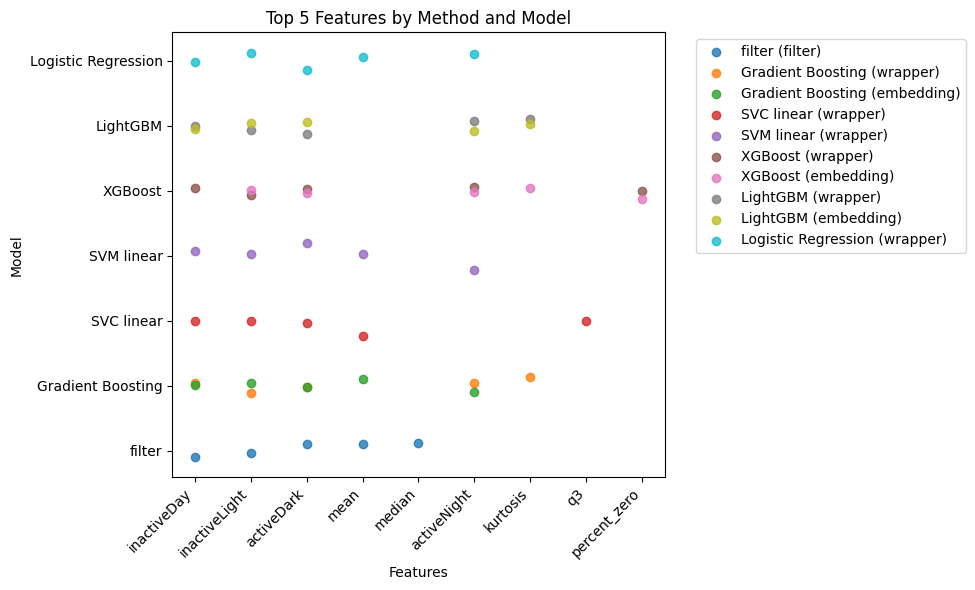

In [107]:
# plot
plot_feature_importance(filter_feat_idx, wrap_feat_idx, embed_feat_idx, male_X_train_scaled)

#### Interpretation for next round (reduced feature models)

* `LightGBM` - **inactiveLight**, **activeDark**, activeNight, ***kurtosis***
* `XGBoost` - **inactiveLight**, **activeDark**, activeNight, **kurtosis**, **percentZero**
* `SVC linear` - inactiveDay, inactiveLight, activeDark, activeNight, mean
* `Gradient Boosting` - **inactiveDay**, **inactiveLight**, activeDark, *kurtosis*, ***activeNight***
* `Logistic Regression` - inactiveDay, inactivelight, activeDark, mean, activeNight

* Trouble with Neural Network and SVM (rbf) 

* `standard deviation` was not important to any model
* 
**Taking to the next round:**

* *italics* not in female dataset
* **bold** progressing to next round


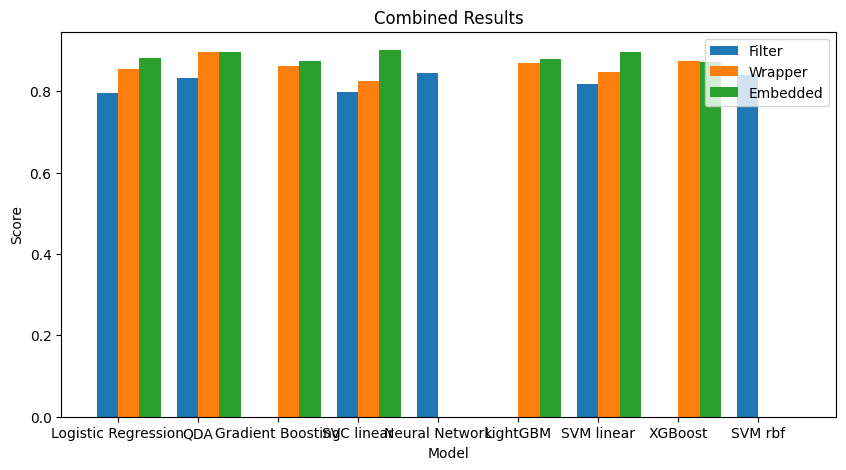

In [108]:
# bar plot
combine_and_plot_dicts(['Filter', 'Wrapper', 'Embedded'], filter_results, wrapper_results, embedded_results)

### Female Dataset


`Neural Network`, `Gradient Boost`, `SVM rbf`, `KNN`, `SVC linear` are top five models going to next round. Also `LightGBM` and `AdaBoost`

In [110]:
# read from csv
female_X_train_scaled = pd.read_csv(output_csv_path + 'female_X_train_scaled.csv')
female_y_train = pd.read_csv(output_csv_path + 'female_y_train.csv').iloc[:, 0]

In [117]:
# fit each model
for model_name, model in models_female:
    model.fit(female_X_train_scaled, female_y_train)

In [118]:
female_vif = calculate_vif(female_X_train_scaled)
print(female_vif.sort_values(by='VIF', ascending=False))

                      VIF
mean           215.106937
q3              48.586190
std             41.554241
median          11.896612
inactiveDay     10.621987
activeNight      6.345972
activeDark       6.045694
inactiveLight    5.942632
percent_zero     4.538334
kurtosis         1.427275
q1               1.325429


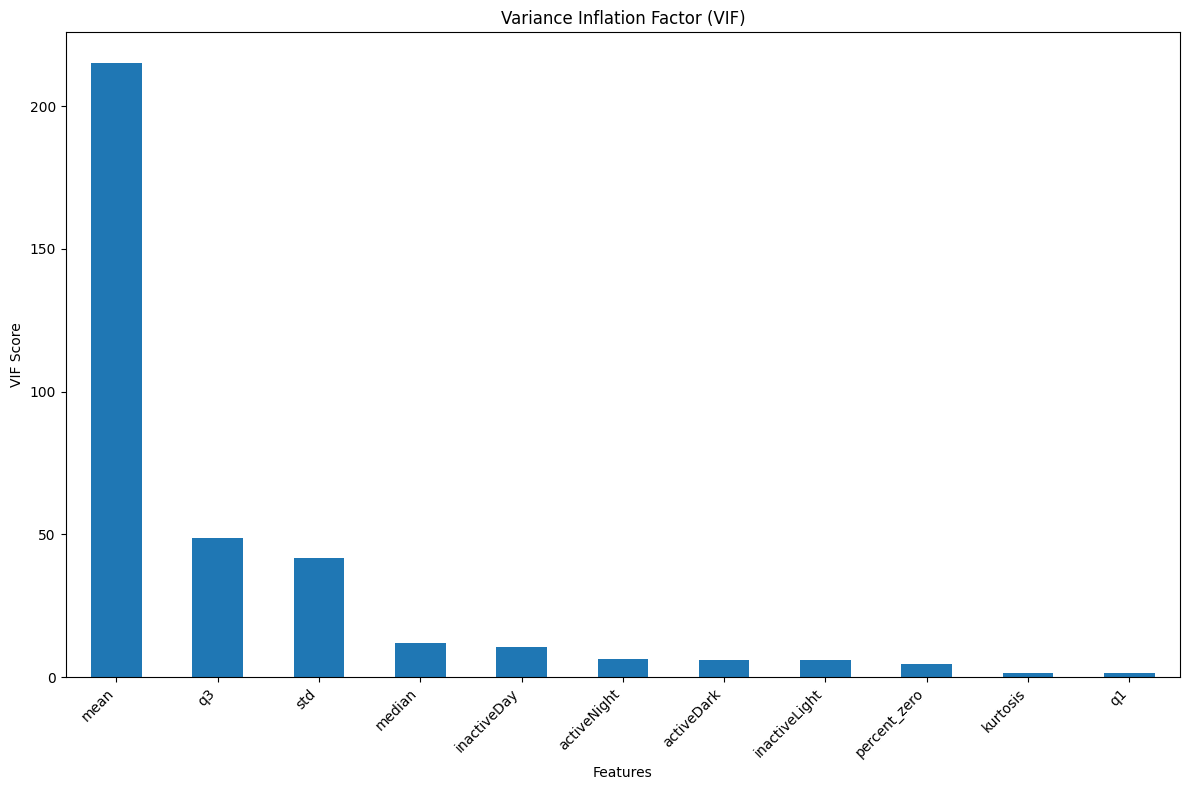

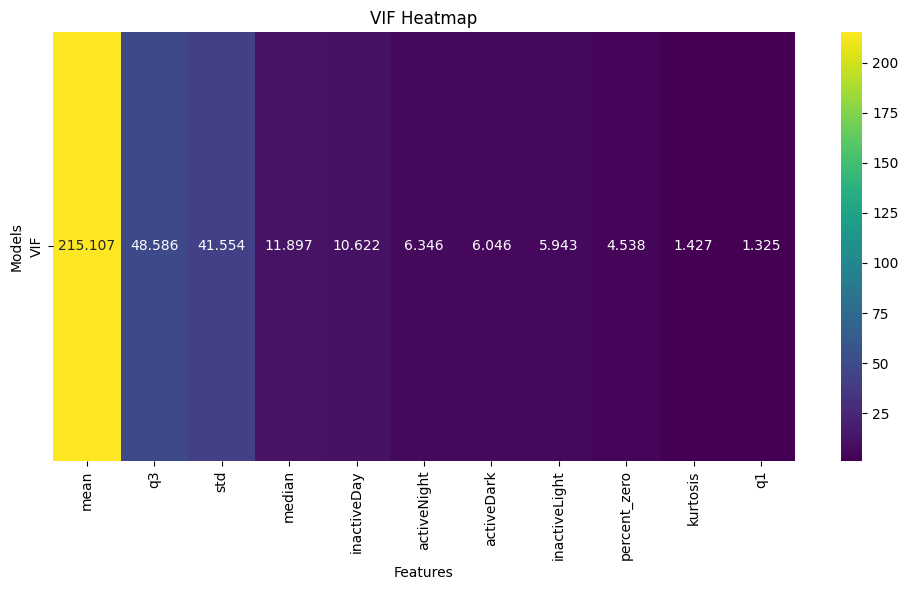

In [114]:
# bar plot vif
plot_vif(female_vif)

# heatmap vif
plot_vif_heatmap(female_vif)

### VIF

* Mean, q3 and std are high VIF

In [119]:
# fit each model
for model_name, model in models_female:
    model.fit(female_X_train_scaled, female_y_train)

# shap values for female model
female_shap = calculate_shap_feature_importance(models_female, female_X_train_scaled, shap_sampling='auto')

Using 325 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/325 [00:00<?, ?it/s]

Using 325 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/325 [00:00<?, ?it/s]

Using 325 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/325 [00:00<?, ?it/s]

Using 325 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/325 [00:00<?, ?it/s]

Using 325 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/325 [00:00<?, ?it/s]

In [120]:
file_path = output_csv_path + 'female_shap.pkl'

# female_shap pickle file
with open(file_path, 'wb') as file:
    pickle.dump(female_shap, file)

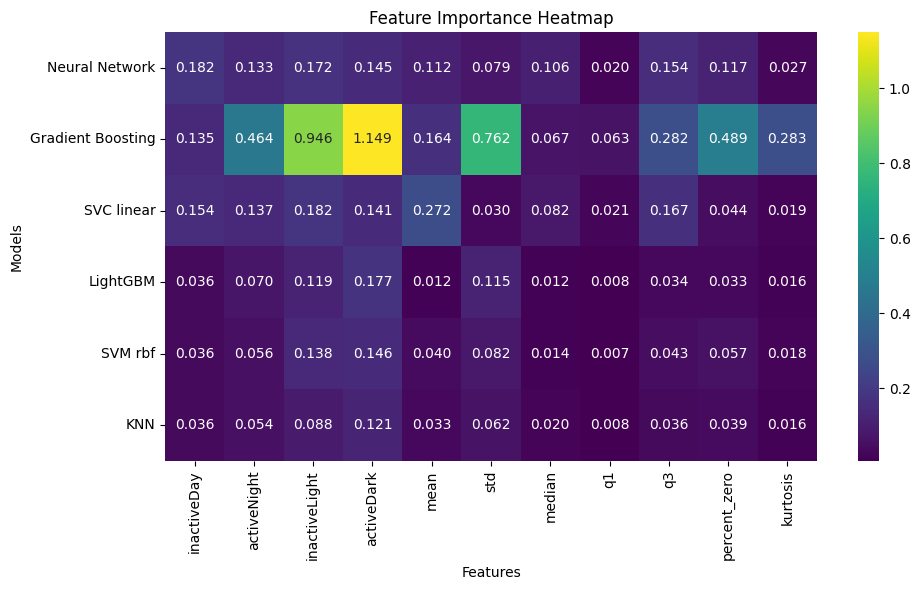

<Figure size 1000x600 with 0 Axes>

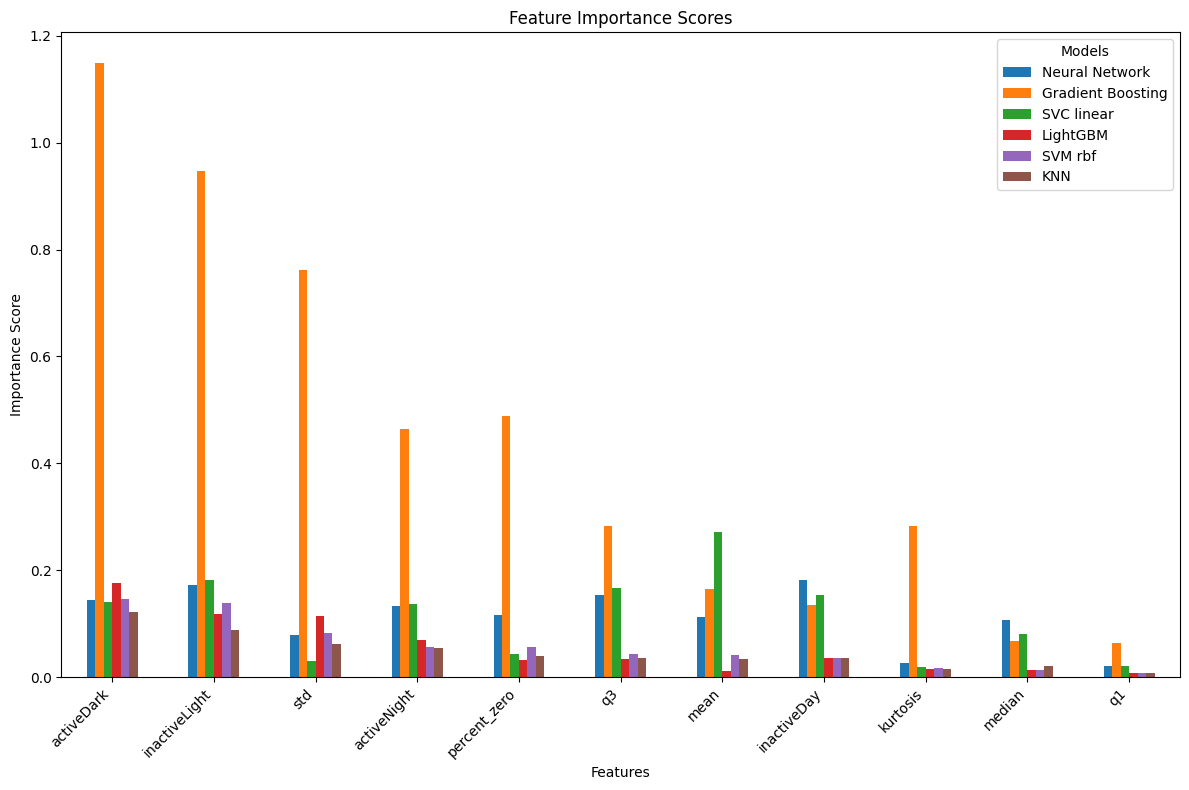

In [121]:
# Sshap heatmap
plot_feature_importance_heatmap(female_shap)
plot_feature_shap(female_shap)

### **SHAP**

* Tree based explainer favoured `inactiveLight` and `activeNight`


Compared to male:

* `percent_zero` and `kurtosis` are more important

In [123]:
# reesults
filter_results, filter_feat_idx = filter_method(female_X_train_scaled, female_y_train, models_female)

{'Neural Network': 0.8184615384615384, 'Gradient Boosting': 0.76, 'SVC linear': 0.7815384615384615, 'LightGBM': 0.7538461538461538, 'SVM rbf': 0.7723076923076924, 'KNN': 0.7784615384615384}


{'filter': array([0, 2, 4, 5, 6], dtype=int64)}


In [131]:
wrapper_results, wrap_feat_idx = wrapper_method(female_X_train_scaled, female_y_train, models_female)

{'Gradient Boosting': 0.8584615384615384, 'SVC linear': 0.7784615384615385, 'LightGBM': 0.8369230769230768, 'Random Forest': 0.8215384615384614}


{'Gradient Boosting': array([1, 2, 3, 5, 9], dtype=int64), 'SVC linear': array([0, 1, 3, 4, 8], dtype=int64), 'LightGBM': array([1, 2, 3, 5, 9], dtype=int64), 'Random Forest': array([2, 3, 5, 6, 9], dtype=int64)}


In [133]:
embedded_results, embed_feat_idx = embedded_method(female_X_train_scaled, female_y_train, models_female)

{'Gradient Boosting': 0.8676923076923077, 'SVC linear': 0.8523076923076923, 'LightGBM': 0.8461538461538461, 'Random Forest': 0.8461538461538461}


{'Gradient Boosting': array([3, 5, 2, 9, 1], dtype=int64), 'LightGBM': array([ 2,  3,  1, 10,  5], dtype=int64), 'Random Forest': array([3, 6, 9, 2, 4], dtype=int64)}


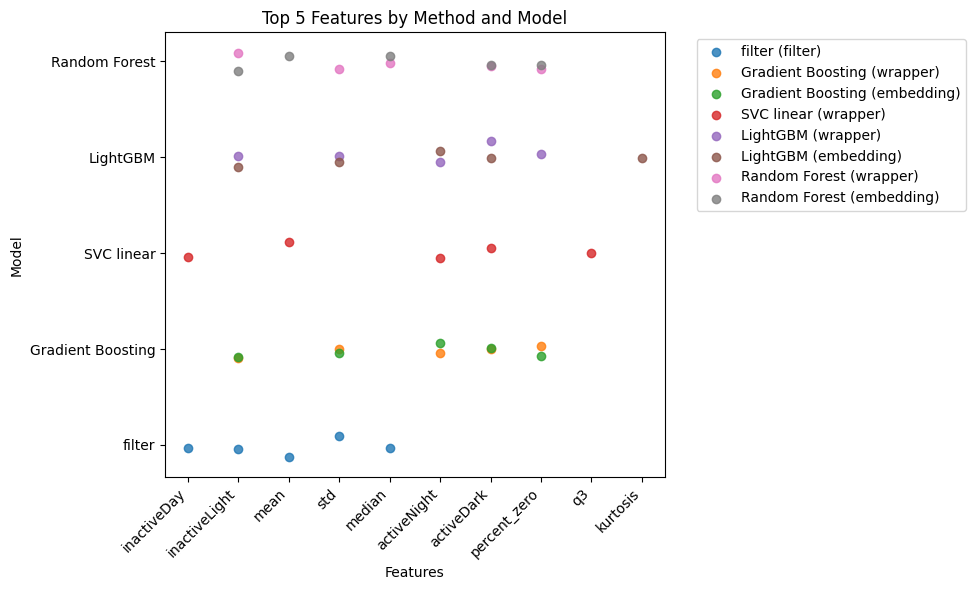

In [135]:
# plot
plot_feature_importance(filter_feat_idx, wrap_feat_idx, embed_feat_idx, female_X_train_scaled)

#### Interpretation for next round (reduced feature models)

* `LightGBM` - **inactiveLight**, **activeDark**, activeNight, ***std***
* `SVC` - inactiveDay, inactiveLight, activeDark, activeNight, *mean*
* `Gradient Boosting` - activeNight, **inactiveLight**, ***std***, **activeDark**, ***percentZero***

* `q1` was not important to any model


* Issues with NN and AdaBoost



#### Both Dataset

`Neural Network`, `XGBoost`, `Logistic Regression`, `SVM linear`, `SVC linear` are top five models going to next round.

In [136]:
# read from csv
both_X_train_scaled = pd.read_csv(output_csv_path + 'both_X_train_scaled.csv')
both_y_train = pd.read_csv(output_csv_path + 'both_y_train.csv').iloc[:, 0]

In [137]:
# fit each model
for model_name, model in models_both:
    model.fit(both_X_train_scaled, both_y_train)

both_vif = calculate_vif(both_X_train_scaled)
print(both_vif.sort_values(by='VIF', ascending=False))

                      VIF
mean           266.632198
q3              58.069436
std             51.088943
median          14.628936
inactiveDay     10.662758
inactiveLight    6.658821
activeNight      5.736180
activeDark       4.295353
percent_zero     3.844183
kurtosis         1.541975
q1               1.430949


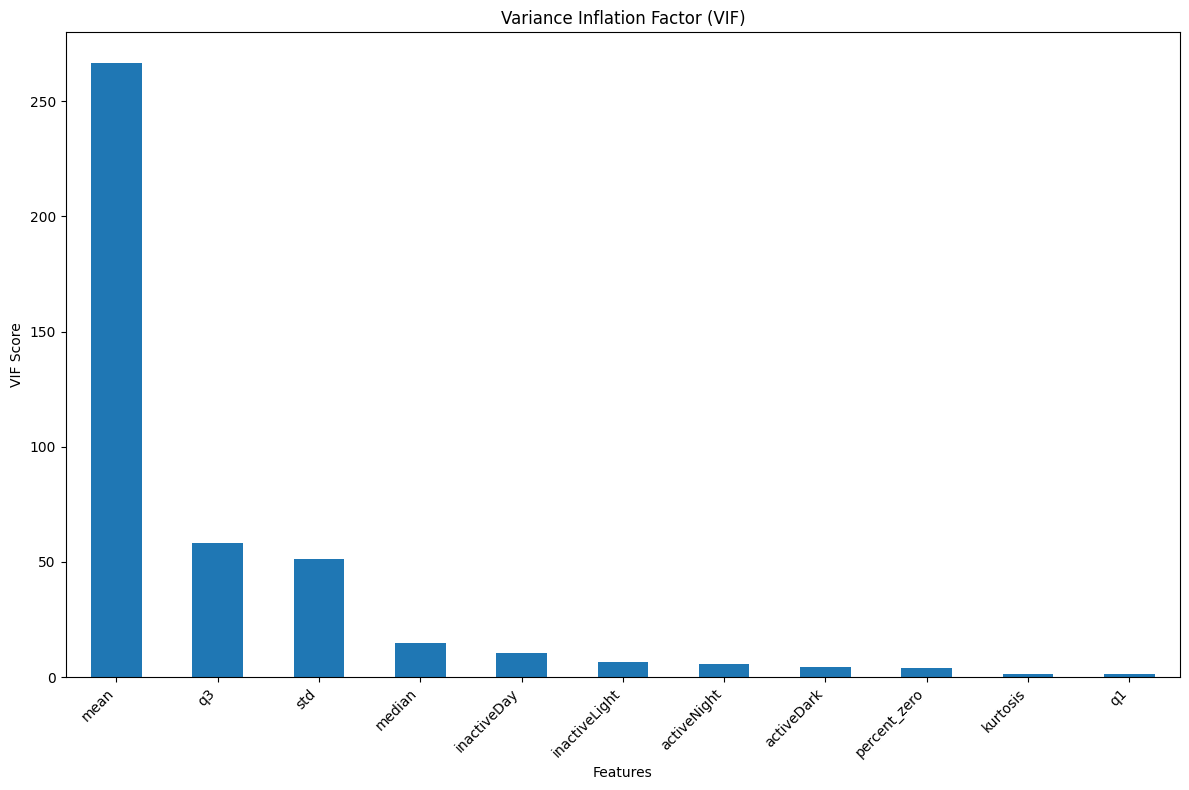

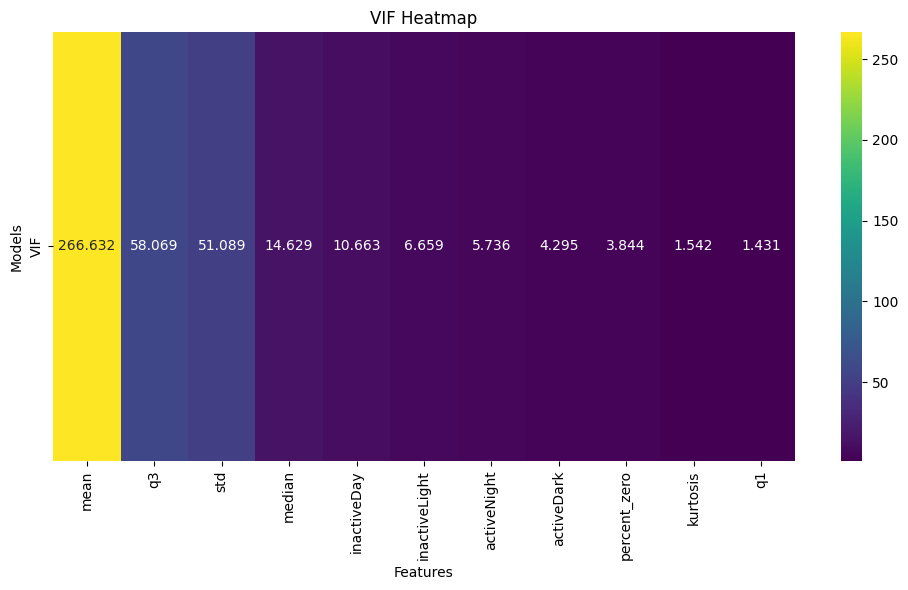

In [138]:
# bar plot vif
plot_vif(both_vif)

# heatmap vif
plot_vif_heatmap(both_vif)

### **VIF**

* as expected high multicollinearity - most features are highly correlated
* `mean` and `q3` are likely redundant given the distribution
* `activeNight` and `activeDark` are going to be very similar
* `inactiveDay` and `inactiveLight` are going to be very similar

Initial proposal: 
* drop `mean`, `activeDark`, `inactiveLight`
  * rationale is that dark and light features require more calculation than the simpler time-based night/day


In [139]:
models_both = [
    ('Gradient Boosting', GradientBoostingClassifier(random_state=RANDOM_STATE)),
   ('XGBoost', XGBClassifier(random_state=RANDOM_STATE)),
    ('LightGBM', LGBMClassifier(verbose=-1, random_state=RANDOM_STATE)),
    ('Random Forest', RandomForestClassifier(random_state=RANDOM_STATE)),
    #,('AdaBoost', AdaBoostClassifier(algorithm='SAMME', random_state=RANDOM_STATE))
    ('Logistic Regression', LogisticRegression(max_iter=5000, random_state=RANDOM_STATE)),
    ('SVM linear', SVC(kernel='linear', random_state=RANDOM_STATE)),
    ('SVC linear', LinearSVC(dual=False, max_iter=10000, random_state=RANDOM_STATE))
]

In [140]:
# fit each model
for model_name, model in models_both:
    model.fit(both_X_train_scaled, both_y_train)

# shap values for  model
both_shap = calculate_shap_feature_importance(models_both, both_X_train_scaled, shap_sampling='auto')

Using 589 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/589 [00:00<?, ?it/s]

Using 589 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/589 [00:00<?, ?it/s]

Using 589 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/589 [00:00<?, ?it/s]

Using 589 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/589 [00:00<?, ?it/s]

In [141]:
# save both_shap to pickle
file_path = output_csv_path + 'both_shap.pkl'

# female_shap pickle file
with open(file_path, 'wb') as file:
    pickle.dump(both_shap, file)

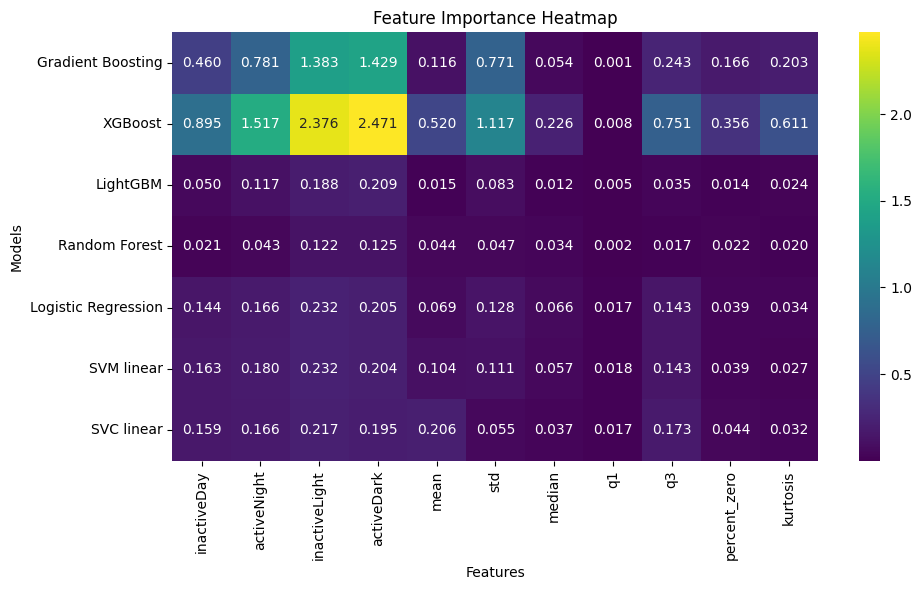

<Figure size 1000x600 with 0 Axes>

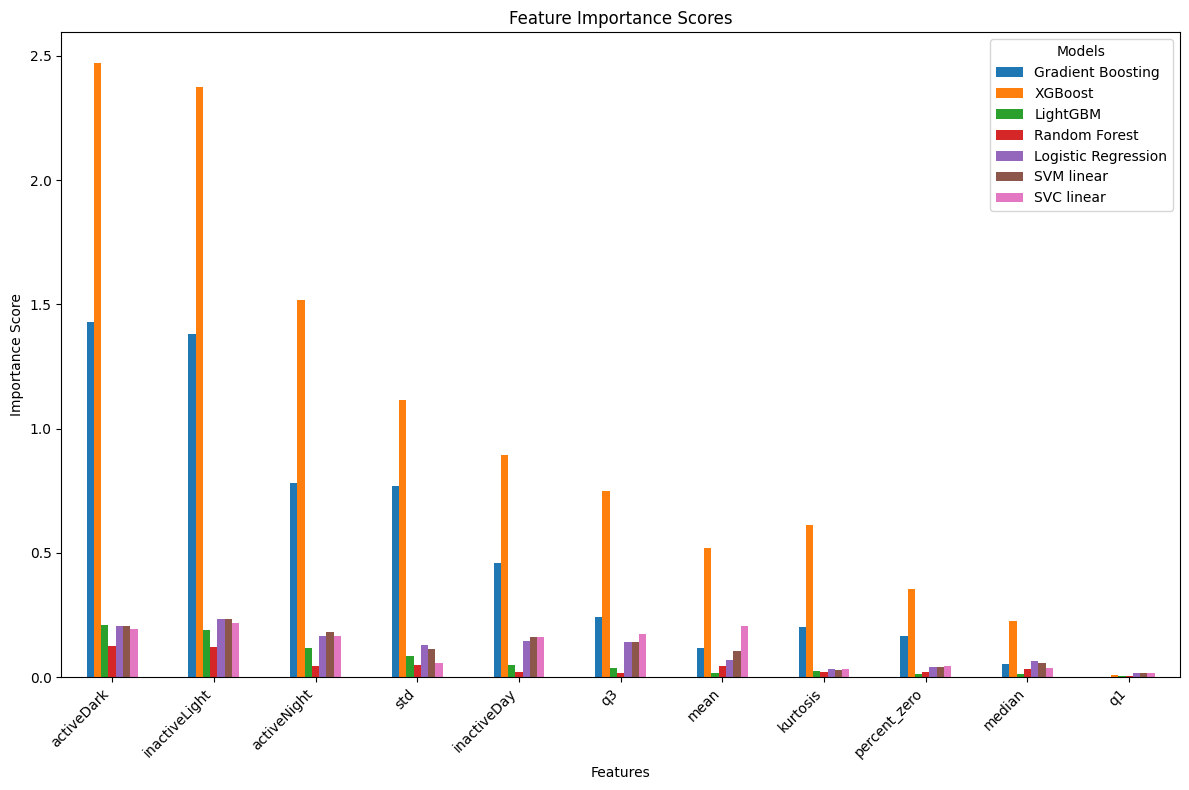

In [142]:
# Sshap heatmap
plot_feature_importance_heatmap(both_shap)
# plot feature importance for each model
plot_feature_shap(both_shap)

#### AdaBoost

`AdaBoost` is an ensemble of weak learners (combines decision trees) into a stronger classifier - thus it is not suitable for SHAP (unless using different explainers).  Instead, the feature importances using `AdaBoost` as classifier are below.

          feature  importance
3      activeDark    0.281621
2   inactiveLight    0.186466
5             std    0.167014
1     activeNight    0.115700
9    percent_zero    0.090534
0     inactiveDay    0.059532
10       kurtosis    0.045857
4            mean    0.029426
6          median    0.023849
7              q1    0.000000
8              q3    0.000000


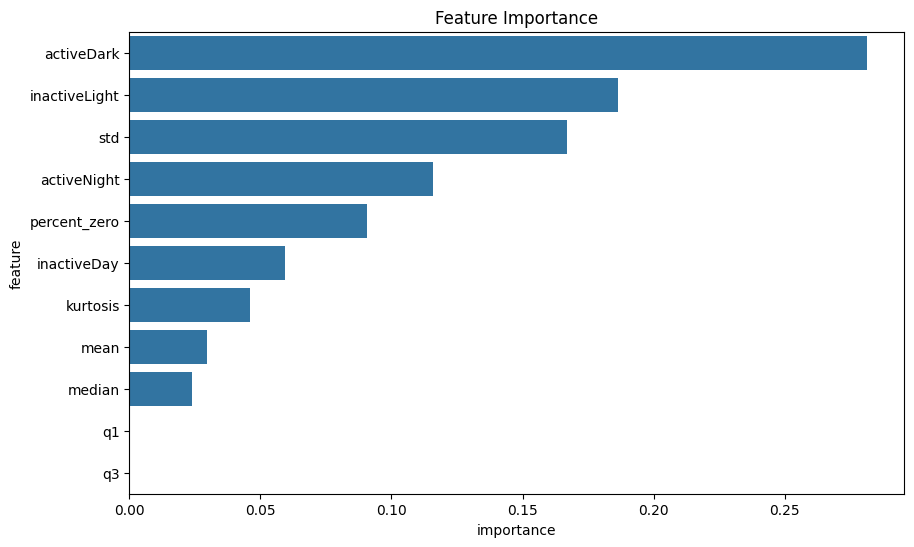

In [143]:
from sklearn.ensemble import AdaBoostClassifier

# Train your AdaBoost model
model = AdaBoostClassifier(algorithm='SAMME', random_state=RANDOM_STATE)
model.fit(both_X_train_scaled, both_y_train)

# Feature importances
feature_importances = model.feature_importances_

# Create DataFrame
feature_importance_df = pd.DataFrame({'feature': both_X_train_scaled.columns, 'importance': feature_importances})

#sort by importance
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

# print feature importance
print(feature_importance_df)

# plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()



### **SHAP**

* Tree based explainer favoured `activeDark`, `inactiveLight` and `activeNight`
* `AdaBoost` favours `activeDark`, `inactiveLight`, `activeNight`, `std`

In [144]:
# reesults
filter_results, filter_feat_idx = filter_method(both_X_train_scaled, both_y_train, models_both)

{'Gradient Boosting': 0.7725047080979284, 'XGBoost': 0.7605388961321166, 'LightGBM': 0.7605823554976098, 'Random Forest': 0.7572070114442997, 'Logistic Regression': 0.7792553962045486, 'SVM linear': 0.7809503114587859, 'SVC linear': 0.780950311458786}


{'filter': array([0, 2, 4, 5, 6], dtype=int64)}


In [150]:
models_both = [
     #('Neural Network', MLPClassifier(max_iter=10000, random_state=RANDOM_STATE)),
     ('Gradient Boosting', GradientBoostingClassifier(random_state=RANDOM_STATE)),
    ('XGBoost', XGBClassifier(random_state=RANDOM_STATE)),
    ('LightGBM', LGBMClassifier(verbose=-1, random_state=RANDOM_STATE)),
    ('Random Forest', RandomForestClassifier(random_state=RANDOM_STATE)),
    ('AdaBoost', AdaBoostClassifier(algorithm='SAMME', random_state=RANDOM_STATE)),
    ('Logistic Regression', LogisticRegression(max_iter=5000, random_state=RANDOM_STATE)),
    ('SVM linear', SVC(kernel='linear', random_state=RANDOM_STATE)),
    ('SVC linear', LinearSVC(dual=False, max_iter=10000, random_state=RANDOM_STATE))
]

In [151]:
wrapper_results, wrap_feat_idx = wrapper_method(both_X_train_scaled, both_y_train, models_both)

{'Gradient Boosting': 0.8692742285962624, 'XGBoost': 0.8539330725771404, 'LightGBM': 0.8471389251050268, 'Random Forest': 0.8539620454874692, 'AdaBoost': 0.8454874692162827, 'Logistic Regression': 0.8353034912356947, 'SVM linear': 0.8232942199043893, 'SVC linear': 0.8097204114153268}


{'Gradient Boosting': array([1, 2, 3, 4, 5], dtype=int64), 'XGBoost': array([1, 2, 3, 5, 7], dtype=int64), 'LightGBM': array([ 0,  1,  2,  3, 10], dtype=int64), 'Random Forest': array([1, 2, 3, 4, 6], dtype=int64), 'AdaBoost': array([0, 1, 2, 3, 5], dtype=int64), 'Logistic Regression': array([1, 2, 3, 4, 8], dtype=int64), 'SVM linear': array([0, 2, 3, 4, 8], dtype=int64), 'SVC linear': array([0, 2, 3, 4, 8], dtype=int64)}


In [152]:
embedded_results, embed_feat_idx = embedded_method(both_X_train_scaled, both_y_train, models_both)

{'Gradient Boosting': 0.869288715051427, 'XGBoost': 0.882833550630161, 'LightGBM': 0.8675793133420253, 'Random Forest': 0.8624655946689843, 'AdaBoost': 0.8539620454874692, 'Logistic Regression': 0.8760249167028826, 'SVM linear': 0.8743300014486455, 'SVC linear': 0.8709111980298421}


{'Gradient Boosting': array([3, 2, 1, 5, 4], dtype=int64), 'XGBoost': array([2, 3, 7, 4, 1], dtype=int64), 'LightGBM': array([ 3,  2, 10,  1,  0], dtype=int64), 'Random Forest': array([3, 2, 0, 6, 4], dtype=int64), 'AdaBoost': array([3, 2, 5, 1, 0], dtype=int64)}


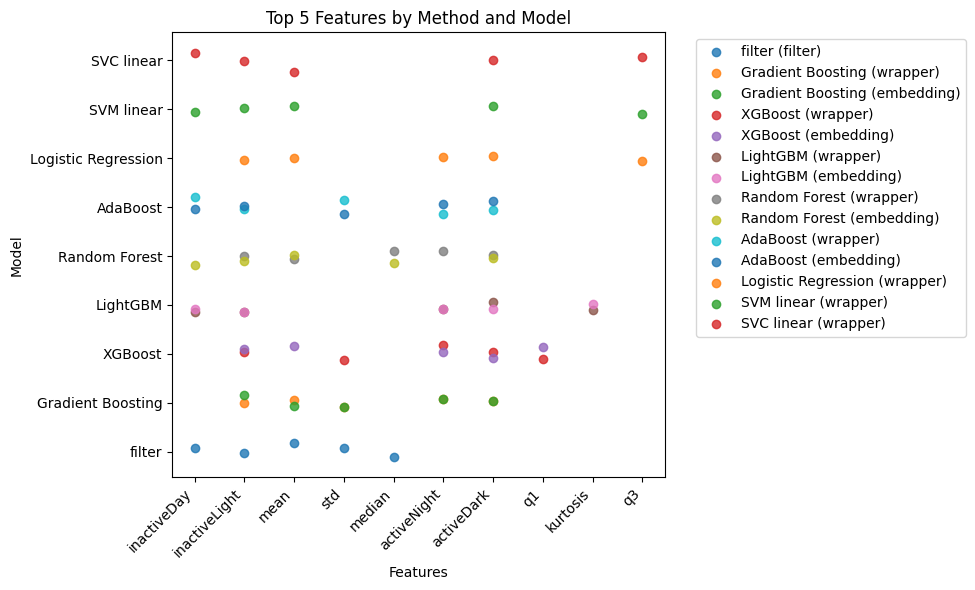

In [154]:
# plot
plot_feature_importance(filter_feat_idx, wrap_feat_idx, embed_feat_idx, both_X_train_scaled)

#### Interpretation for next round (reduced feature models)

* `LightGBM` - **inactiveDay**, **activeDark**, **kurtosis**
* `XGBoost` - **inactiveLight**, **std**, **activeDark**, **activeNight**, **q1**
* `AdaBoost` - **inactiveDay**, **inactiveLight**, **activeDark**, **activeNight**, **std**
* `Gradient Boosting` -  **inactiveLight**, **kurtosis**, **activeNight**, **activeDark**
* `Random Forest` - **inactiveLight**, **median**, **activeDark**

